In [1]:
#referencia -  https://realpython.com/read-write-files-python/

## ARCHIVOS

In [2]:
#abrir archivos
file = open('dog_breeds.txt')

In [5]:
#manera correcta con el close
reader = open('dog_breeds.txt')
try:
    print('WORKS')
finally:
    reader.close()

WORKS


In [7]:
#opción recomendada with - se encarga del close
with open('dog_breeds.txt', 'r') as reader:
    print('WORKS')

WORKS


In [8]:
#otras opciones
#w, rb, wb

In [9]:
#file types
file = open('dog_breeds.txt')
type(file)

_io.TextIOWrapper

In [10]:
#buffered
file = open('dog_breeds.txt', 'rb')
type(file)

_io.BufferedReader

In [11]:
file = open('dog_breeds.txt', 'wb')
type(file)

_io.BufferedWriter

In [12]:
file = open('dog_breeds.txt', 'rb', buffering=0)
type(file)

_io.FileIO

In [17]:
#read files
with open('dog_breeds.txt', 'r') as reader:
# Imprimir el archivo entero
    print("READING")
    print(reader.read())

READING
Pug
Jack Russell Terrier
English Springer Spaniel
German Shepherd
Staffordshire Bull Terrier
Cavalier King Charles Spaniel
Golden Retriever
West Highland White Terrier
Boxer
Border Terrier


In [18]:
with open('dog_breeds.txt', 'r') as reader:
# Leer e imprimir 5 caracteres de la línea 5 veces
    print(reader.readline(5))
    print(reader.readline(5))
    print(reader.readline(5))
    print(reader.readline(5))
    print(reader.readline(5))

Pug

Jack 
Russe
ll Te
rrier


In [19]:
#leer como lista
f = open('dog_breeds.txt')
f.readlines()  

['Pug\n',
 'Jack Russell Terrier\n',
 'English Springer Spaniel\n',
 'German Shepherd\n',
 'Staffordshire Bull Terrier\n',
 'Cavalier King Charles Spaniel\n',
 'Golden Retriever\n',
 'West Highland White Terrier\n',
 'Boxer\n',
 'Border Terrier']

In [20]:
#lista opción 2
f = open('dog_breeds.txt')
out = list(f)
out

['Pug\n',
 'Jack Russell Terrier\n',
 'English Springer Spaniel\n',
 'German Shepherd\n',
 'Staffordshire Bull Terrier\n',
 'Cavalier King Charles Spaniel\n',
 'Golden Retriever\n',
 'West Highland White Terrier\n',
 'Boxer\n',
 'Border Terrier']

In [21]:
#iterar
with open('dog_breeds.txt', 'r') as reader:
# Leer e imprimir línea por línea
    line = reader.readline()
    while line != '':  # EOF es vacio
        print(line, end='')
        line = reader.readline()

Pug
Jack Russell Terrier
English Springer Spaniel
German Shepherd
Staffordshire Bull Terrier
Cavalier King Charles Spaniel
Golden Retriever
West Highland White Terrier
Boxer
Border Terrier

In [22]:
#iterar opcion 2
with open('dog_breeds.txt', 'r') as reader:
    for line in reader.readlines():
        print(line, end='')

Pug
Jack Russell Terrier
English Springer Spaniel
German Shepherd
Staffordshire Bull Terrier
Cavalier King Charles Spaniel
Golden Retriever
West Highland White Terrier
Boxer
Border Terrier

In [23]:
#iterar opcion 3 - eficiente
with open('dog_breeds.txt', 'r') as reader:
# Leer e imprimir línea por línea
    for line in reader:
        print(line, end='')

Pug
Jack Russell Terrier
English Springer Spaniel
German Shepherd
Staffordshire Bull Terrier
Cavalier King Charles Spaniel
Golden Retriever
West Highland White Terrier
Boxer
Border Terrier

In [24]:
#WRITING
with open('dog_breeds.txt', 'r') as reader:
    dog_breeds = reader.readlines()

with open('dog_breeds_reversed.txt', 'w') as writer:
    # escribir de modo invertido
    for breed in reversed(dog_breeds):
        writer.write(breed)

In [25]:
#LEER BINARIO
with open('jack_russell.png', 'rb') as byte_reader:
    print(byte_reader.read(1))
    print(byte_reader.read(3))
    print(byte_reader.read(2))
    print(byte_reader.read(1))
    print(byte_reader.read(1))

b'\x89'
b'PNG'
b'\r\n'
b'\x1a'
b'\n'


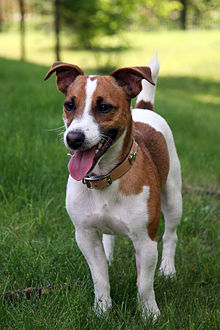

In [27]:
#PERO COMO VEMOS LA IMAGEN?
#PILLOW
#pip install pillow
import PIL.Image
from IPython.display import display
image = PIL.Image.open('jack_russell.png')
display(image)
#image.show() abre aplicación local

In [28]:
#APPENDS
with open('dog_breeds.txt', 'a') as a_writer:
    a_writer.write('\nBeagle')
with open('dog_breeds.txt', 'r') as reader:
    print(reader.read())

Pug
Jack Russell Terrier
English Springer Spaniel
German Shepherd
Staffordshire Bull Terrier
Cavalier King Charles Spaniel
Golden Retriever
West Highland White Terrier
Boxer
Border Terrier
Beagle


In [29]:
#trabajar con 2 archivos al mismo tiempo
d_path = 'dog_breeds.txt'
d_r_path = 'dog_breeds_reversed.txt'
with open(d_path, 'r') as reader, open(d_r_path, 'w') as writer:
    dog_breeds = reader.readlines()
    writer.writelines(reversed(dog_breeds))

In [ ]:
#PRACTICA 1
#convertir dog_breeds en mayuscula y guardarlo en otro archivo dog_breeds_m.txt

In [15]:
#UNA SOLUCION
templ = []
with open('dog_breeds.txt', 'r') as mreader:
    for l in mreader:
        templ.append(l.upper())
        
with open('dog_breeds_m.txt', 'w') as mwriter:
    mwriter.writelines(templ)

## SQL

In [ ]:
#referencia - https://docs.sqlalchemy.org/en/13/orm/tutorial.html
#instalar sqlite browser
#https://sqlitebrowser.org/

In [ ]:
#conda install sqlalchemy

In [2]:
import sqlalchemy
sqlalchemy.__version__ 

'1.4.39'

In [3]:
#CONECTAR A BD
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:', echo=True)

In [4]:
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [ ]:
#CREAR DATOS

In [5]:
from sqlalchemy import Column, Integer, String
class User(Base):
    __tablename__ = 'users'
    id = Column(Integer, primary_key=True)
    name = Column(String)
    fullname = Column(String)
    nickname = Column(String)
    def __repr__(self):
        return "<User(name='%s', fullname='%s', nickname='%s')>" % (self.name, self.fullname, self.nickname)

In [6]:
User.__table__ 

Table('users', MetaData(), Column('id', Integer(), table=<users>, primary_key=True, nullable=False), Column('name', String(), table=<users>), Column('fullname', String(), table=<users>), Column('nickname', String(), table=<users>), schema=None)

In [7]:
#crear tablas
Base.metadata.create_all(engine)

2023-02-06 11:25:35,545 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-02-06 11:25:35,549 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("users")
2023-02-06 11:25:35,550 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-02-06 11:25:35,552 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("users")
2023-02-06 11:25:35,554 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-02-06 11:25:35,555 INFO sqlalchemy.engine.Engine 
CREATE TABLE users (
	id INTEGER NOT NULL, 
	name VARCHAR, 
	fullname VARCHAR, 
	nickname VARCHAR, 
	PRIMARY KEY (id)
)


2023-02-06 11:25:35,556 INFO sqlalchemy.engine.Engine [no key 0.00051s] ()
2023-02-06 11:25:35,557 INFO sqlalchemy.engine.Engine COMMIT


In [8]:
ed_user = User(name='ed', fullname='Ed Jones', nickname='edsnickname')

In [9]:
print(ed_user)

<User(name='ed', fullname='Ed Jones', nickname='edsnickname')>


In [10]:
print(ed_user.fullname)

Ed Jones


In [11]:
#pero no tiene id!! Por?
print(ed_user.id)

None


In [12]:
#crear sesión
from sqlalchemy.orm import sessionmaker
Session = sessionmaker(bind=engine)
session = Session()

In [13]:
ed_user = User(name='ed', fullname='Ed Jones', nickname='edsnickname')
session.add(ed_user)

In [14]:
#ADD/UPDATE
session.add_all([
User(name='wendy', fullname='Wendy Williams', nickname='windy'),
User(name='mary', fullname='Mary Contrary', nickname='mary'),
User(name='fred', fullname='Fred Flintstone', nickname='freddy')])

In [15]:
#update
ed_user.nickname = 'eddie'

In [16]:
#commit
session.commit()

2023-02-06 11:25:54,567 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-02-06 11:25:54,572 INFO sqlalchemy.engine.Engine INSERT INTO users (name, fullname, nickname) VALUES (?, ?, ?)
2023-02-06 11:25:54,574 INFO sqlalchemy.engine.Engine [generated in 0.00151s] ('ed', 'Ed Jones', 'eddie')
2023-02-06 11:25:54,575 INFO sqlalchemy.engine.Engine INSERT INTO users (name, fullname, nickname) VALUES (?, ?, ?)
2023-02-06 11:25:54,576 INFO sqlalchemy.engine.Engine [cached since 0.003726s ago] ('wendy', 'Wendy Williams', 'windy')
2023-02-06 11:25:54,577 INFO sqlalchemy.engine.Engine INSERT INTO users (name, fullname, nickname) VALUES (?, ?, ?)
2023-02-06 11:25:54,578 INFO sqlalchemy.engine.Engine [cached since 0.005645s ago] ('mary', 'Mary Contrary', 'mary')
2023-02-06 11:25:54,579 INFO sqlalchemy.engine.Engine INSERT INTO users (name, fullname, nickname) VALUES (?, ?, ?)
2023-02-06 11:25:54,580 INFO sqlalchemy.engine.Engine [cached since 0.007603s ago] ('fred', 'Fred Flintstone', 'freddy')
2

In [17]:
#QUERIES
for instance in session.query(User).order_by(User.id):
    print(instance.name, instance.fullname)

2023-02-06 11:25:56,992 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-02-06 11:25:57,000 INFO sqlalchemy.engine.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.nickname AS users_nickname 
FROM users ORDER BY users.id
2023-02-06 11:25:57,001 INFO sqlalchemy.engine.Engine [generated in 0.00072s] ()
ed Ed Jones
wendy Wendy Williams
mary Mary Contrary
fred Fred Flintstone


In [18]:
for name, fullname in session.query(User.name, User.fullname):
    print(name, fullname)

2023-02-06 11:25:59,477 INFO sqlalchemy.engine.Engine SELECT users.name AS users_name, users.fullname AS users_fullname 
FROM users
2023-02-06 11:25:59,481 INFO sqlalchemy.engine.Engine [generated in 0.00324s] ()
ed Ed Jones
wendy Wendy Williams
mary Mary Contrary
fred Fred Flintstone


In [19]:
for u in session.query(User).order_by(User.id)[1:3]:
    print(u)

2023-02-06 11:26:01,839 INFO sqlalchemy.engine.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.nickname AS users_nickname 
FROM users ORDER BY users.id
 LIMIT ? OFFSET ?
2023-02-06 11:26:01,841 INFO sqlalchemy.engine.Engine [generated in 0.00247s] (2, 1)
<User(name='wendy', fullname='Wendy Williams', nickname='windy')>
<User(name='mary', fullname='Mary Contrary', nickname='mary')>


In [20]:
for name, in session.query(User.name).\
    filter_by(fullname='Ed Jones'):
    print(name)

2023-02-06 11:26:04,087 INFO sqlalchemy.engine.Engine SELECT users.name AS users_name 
FROM users 
WHERE users.fullname = ?
2023-02-06 11:26:04,090 INFO sqlalchemy.engine.Engine [generated in 0.00281s] ('Ed Jones',)
ed


In [21]:
for name, in session.query(User.name).\
    filter(User.fullname=='Ed Jones'):
    print(name)

2023-02-06 11:26:05,990 INFO sqlalchemy.engine.Engine SELECT users.name AS users_name 
FROM users 
WHERE users.fullname = ?
2023-02-06 11:26:05,993 INFO sqlalchemy.engine.Engine [cached since 1.907s ago] ('Ed Jones',)
ed


In [22]:
for user in session.query(User).\
    filter(User.name=='ed').\
    filter(User.fullname=='Ed Jones'):
    print(user)

2023-02-06 11:26:08,219 INFO sqlalchemy.engine.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.nickname AS users_nickname 
FROM users 
WHERE users.name = ? AND users.fullname = ?
2023-02-06 11:26:08,221 INFO sqlalchemy.engine.Engine [generated in 0.00241s] ('ed', 'Ed Jones')
<User(name='ed', fullname='Ed Jones', nickname='eddie')>


In [23]:
#OPERADORES
for user in session.query(User).\
    filter(User.name.in_(['ed', 'wendy', 'jack'])):
    print(user)

2023-02-06 11:26:10,396 INFO sqlalchemy.engine.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.nickname AS users_nickname 
FROM users 
WHERE users.name IN (?, ?, ?)
2023-02-06 11:26:10,398 INFO sqlalchemy.engine.Engine [generated in 0.00273s] ('ed', 'wendy', 'jack')
<User(name='ed', fullname='Ed Jones', nickname='eddie')>
<User(name='wendy', fullname='Wendy Williams', nickname='windy')>


In [24]:
for user in session.query(User).\
    filter(User.name.like('%ed%')):
    print(user)

2023-02-06 11:26:12,608 INFO sqlalchemy.engine.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.nickname AS users_nickname 
FROM users 
WHERE users.name LIKE ?
2023-02-06 11:26:12,612 INFO sqlalchemy.engine.Engine [generated in 0.00385s] ('%ed%',)
<User(name='ed', fullname='Ed Jones', nickname='eddie')>
<User(name='fred', fullname='Fred Flintstone', nickname='freddy')>


In [25]:
#RETORNAR LISTAS
query = session.query(User).filter(User.name.like('%ed')).order_by(User.id)
query.all()

2023-02-06 11:26:14,708 INFO sqlalchemy.engine.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.nickname AS users_nickname 
FROM users 
WHERE users.name LIKE ? ORDER BY users.id
2023-02-06 11:26:14,711 INFO sqlalchemy.engine.Engine [generated in 0.00322s] ('%ed',)


[<User(name='ed', fullname='Ed Jones', nickname='eddie')>,
 <User(name='fred', fullname='Fred Flintstone', nickname='freddy')>]

In [26]:
query[0]

2023-02-06 11:26:16,829 INFO sqlalchemy.engine.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.nickname AS users_nickname 
FROM users 
WHERE users.name LIKE ? ORDER BY users.id
 LIMIT ? OFFSET ?
2023-02-06 11:26:16,834 INFO sqlalchemy.engine.Engine [generated in 0.00482s] ('%ed', 1, 0)


<User(name='ed', fullname='Ed Jones', nickname='eddie')>

In [27]:
#GUARDAR BASES DE DATOS
from sqlalchemy import create_engine
engine = create_engine('sqlite:///users.db', echo=True)

In [28]:
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [29]:
from sqlalchemy import Column, Integer, String
class User(Base):
    __tablename__ = 'users'
    id = Column(Integer, primary_key=True)
    name = Column(String)
    fullname = Column(String)
    nickname = Column(String)
    def __repr__(self):
        return "<User(name='%s', fullname='%s', nickname='%s')>" % (self.name, self.fullname, self.nickname)

In [30]:
Base.metadata.create_all(engine)

2023-02-06 11:27:07,000 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-02-06 11:27:07,003 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("users")
2023-02-06 11:27:07,005 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-02-06 11:27:07,006 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("users")
2023-02-06 11:27:07,008 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-02-06 11:27:07,010 INFO sqlalchemy.engine.Engine 
CREATE TABLE users (
	id INTEGER NOT NULL, 
	name VARCHAR, 
	fullname VARCHAR, 
	nickname VARCHAR, 
	PRIMARY KEY (id)
)


2023-02-06 11:27:07,010 INFO sqlalchemy.engine.Engine [no key 0.00060s] ()
2023-02-06 11:27:07,012 INFO sqlalchemy.engine.Engine COMMIT


In [31]:
from sqlalchemy.orm import sessionmaker
Session = sessionmaker(bind=engine)
session = Session()

In [32]:
session.add_all([
User(name='wendy', fullname='Wendy Williams', nickname='windy'),
User(name='mary', fullname='Mary Contrary', nickname='mary'),
User(name='fred', fullname='Fred Flintstone', nickname='freddy')])

In [33]:
session.commit()

2023-02-06 11:27:12,911 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-02-06 11:27:12,916 INFO sqlalchemy.engine.Engine INSERT INTO users (name, fullname, nickname) VALUES (?, ?, ?)
2023-02-06 11:27:12,917 INFO sqlalchemy.engine.Engine [generated in 0.00182s] ('wendy', 'Wendy Williams', 'windy')
2023-02-06 11:27:12,921 INFO sqlalchemy.engine.Engine INSERT INTO users (name, fullname, nickname) VALUES (?, ?, ?)
2023-02-06 11:27:12,922 INFO sqlalchemy.engine.Engine [cached since 0.006439s ago] ('mary', 'Mary Contrary', 'mary')
2023-02-06 11:27:12,923 INFO sqlalchemy.engine.Engine INSERT INTO users (name, fullname, nickname) VALUES (?, ?, ?)
2023-02-06 11:27:12,923 INFO sqlalchemy.engine.Engine [cached since 0.00785s ago] ('fred', 'Fred Flintstone', 'freddy')
2023-02-06 11:27:12,924 INFO sqlalchemy.engine.Engine COMMIT


## CSV

In [1]:
#incluye pandas
#referencia - https://realpython.com/python-csv/

In [9]:
#opcion 1 - caracteres
import csv
with open('birthday.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print('Column names are {}'.format(row))
            line_count += 1
        else:
            print('\t{} works in the {} department, and was born in {}.'.format(row[0], row[1], row[2]))
            line_count += 1
    print('Processed {} lines.'.format(line_count))

Column names are ['name', 'department', 'birthday month']
	John Smith works in the Accounting department, and was born in November.
	Erica Meyers works in the IT department, and was born in March.
Processed 3 lines.


In [14]:
#opcion 2 diccionario
import csv
with open('birthday.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print('Column names are {}'.format(row.keys()))
            line_count += 1
        print('\t{} works in the {} department, and was born in {}.'.format(row["name"], row["department"], row["birthday month"]))
        line_count += 1
    print('Processed {} lines.'.format(line_count))

Column names are dict_keys(['name', 'department', 'birthday month'])
	John Smith works in the Accounting department, and was born in November.
	Erica Meyers works in the IT department, and was born in March.
Processed 3 lines.


In [15]:
#WRITE CSV
#opcion 1
import csv
with open('employee_file.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    employee_writer.writerow(['John Smith', 'Accounting', 'November'])
    employee_writer.writerow(['Erica Meyers', 'IT', 'March'])

In [16]:
#opcion 2 diccionario
import csv
with open('employee_file2.csv', mode='w') as csv_file:
    fieldnames = ['emp_name', 'dept', 'birth_month']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerow({'emp_name': 'John Smith', 'dept': 'Accounting', 'birth_month': 'November'})
    writer.writerow({'emp_name': 'Erica Meyers', 'dept': 'IT', 'birth_month': 'March'})

In [17]:
#CSV CON PANDAS
#conda install pandas
import pandas
df = pandas.read_csv('hrdata.csv')
print(df)

             Name Hire Date   Salary  Sick Days remaining
0  Graham Chapman  03/15/14  50000.0                   10
1     John Cleese  06/01/15  65000.0                    8
2       Eric Idle  05/12/14  45000.0                   10
3     Terry Jones  11/01/13  70000.0                    3
4   Terry Gilliam  08/12/14  48000.0                    7
5   Michael Palin  05/23/13  66000.0                    8


In [18]:
#no todas las conversiones son las adecuadas
print(type(df['Hire Date'][0]))

<class 'str'>


In [19]:
#cambio de indice
df = pandas.read_csv('hrdata.csv', index_col='Name')
print(df)

               Hire Date   Salary  Sick Days remaining
Name                                                  
Graham Chapman  03/15/14  50000.0                   10
John Cleese     06/01/15  65000.0                    8
Eric Idle       05/12/14  45000.0                   10
Terry Jones     11/01/13  70000.0                    3
Terry Gilliam   08/12/14  48000.0                    7
Michael Palin   05/23/13  66000.0                    8


In [20]:
#cambio de tipo de dato
df = pandas.read_csv('hrdata.csv', index_col='Name', parse_dates=['Hire Date'])
print(df)

                Hire Date   Salary  Sick Days remaining
Name                                                   
Graham Chapman 2014-03-15  50000.0                   10
John Cleese    2015-06-01  65000.0                    8
Eric Idle      2014-05-12  45000.0                   10
Terry Jones    2013-11-01  70000.0                    3
Terry Gilliam  2014-08-12  48000.0                    7
Michael Palin  2013-05-23  66000.0                    8


In [21]:
print(type(df['Hire Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [22]:
#cambio de columnas
df = pandas.read_csv('hrdata.csv', 
            index_col='Employee', 
            parse_dates=['Hired'], 
            header=0, 
            names=['Employee', 'Hired','Salary', 'Sick Days'])
print(df)

                    Hired   Salary  Sick Days
Employee                                     
Graham Chapman 2014-03-15  50000.0         10
John Cleese    2015-06-01  65000.0          8
Eric Idle      2014-05-12  45000.0         10
Terry Jones    2013-11-01  70000.0          3
Terry Gilliam  2014-08-12  48000.0          7
Michael Palin  2013-05-23  66000.0          8


In [23]:
#write csv with pandas
df = pandas.read_csv('hrdata.csv', 
            index_col='Employee', 
            parse_dates=['Hired'],
            header=0, 
            names=['Employee', 'Hired', 'Salary', 'Sick Days'])
df.to_csv('hrdata_modified.csv')

## JSON

In [3]:
#https://realpython.com/python-json/
import json

In [1]:
#serialization
data = {
    "president": {
        "name": "Zaphod Beeblebrox",
        "species": "Betelgeusian"
    }
}

In [4]:
#crear archivo json
with open("data_file.json", "w") as write_file:
    json.dump(data, write_file)

In [5]:
#leer archivo json
json_string = json.dumps(data)
print(json_string)

{"president": {"species": "Betelgeusian", "name": "Zaphod Beeblebrox"}}


In [7]:
json_string = json.dumps(data, indent=4)
print(json_string)

{
    "president": {
        "species": "Betelgeusian",
        "name": "Zaphod Beeblebrox"
    }
}


In [11]:
type(json_string)

str

In [9]:
#load file
with open("data_file.json", "r") as read_file:
    data = json.load(read_file)
print(data)

{'president': {'species': 'Betelgeusian', 'name': 'Zaphod Beeblebrox'}}


In [10]:
type(data)

dict

In [12]:
#load string
njson_string = """
{
    "researcher": {
        "name": "Ford Prefect",
        "species": "Betelgeusian",
        "relatives": [
            {
                "name": "Zaphod Beeblebrox",
                "species": "Betelgeusian"
            }
        ]
    }
}
"""
ndata = json.loads(njson_string)
print(ndata)

{'researcher': {'relatives': [{'species': 'Betelgeusian', 'name': 'Zaphod Beeblebrox'}], 'species': 'Betelgeusian', 'name': 'Ford Prefect'}}


In [13]:
type(ndata)

dict

In [15]:
#real world example
import json
import requests
response = requests.get("https://jsonplaceholder.typicode.com/todos")
todos = json.loads(response.text)

In [16]:
len(todos)

200

In [20]:
todos

[{'completed': False, 'id': 1, 'title': 'delectus aut autem', 'userId': 1},
 {'completed': False,
  'id': 2,
  'title': 'quis ut nam facilis et officia qui',
  'userId': 1},
 {'completed': False, 'id': 3, 'title': 'fugiat veniam minus', 'userId': 1},
 {'completed': True, 'id': 4, 'title': 'et porro tempora', 'userId': 1},
 {'completed': False,
  'id': 5,
  'title': 'laboriosam mollitia et enim quasi adipisci quia provident illum',
  'userId': 1},
 {'completed': False,
  'id': 6,
  'title': 'qui ullam ratione quibusdam voluptatem quia omnis',
  'userId': 1},
 {'completed': False,
  'id': 7,
  'title': 'illo expedita consequatur quia in',
  'userId': 1},
 {'completed': True,
  'id': 8,
  'title': 'quo adipisci enim quam ut ab',
  'userId': 1},
 {'completed': False,
  'id': 9,
  'title': 'molestiae perspiciatis ipsa',
  'userId': 1},
 {'completed': True,
  'id': 10,
  'title': 'illo est ratione doloremque quia maiores aut',
  'userId': 1},
 {'completed': True,
  'id': 11,
  'title': 'vero

In [19]:
# Map of userId to number of complete TODOs for that user
todos_by_user = {}

# Increment complete TODOs count for each user.
for todo in todos:
    if todo["completed"]:
        try:
            # Increment the existing user's count.
            todos_by_user[todo["userId"]] += 1
        except KeyError:
            # This user has not been seen. Set their count to 1.
            todos_by_user[todo["userId"]] = 1

# Create a sorted list of (userId, num_complete) pairs.
top_users = sorted(todos_by_user.items(), 
                   key=lambda x: x[1], reverse=True)

print(top_users)

[(5, 12), (10, 12), (1, 11), (8, 11), (7, 9), (2, 8), (9, 8), (3, 7), (4, 6), (6, 6)]


In [22]:
# Get the maximum number of complete TODOs.
max_complete = top_users[0][1]

# Create a list of all users who have completed
# the maximum number of TODOs.
users = []
for user, num_complete in top_users:
    if num_complete < max_complete:
        break
    users.append(str(user))

max_users = " and ".join(users)
print(max_users)

5 and 10


In [23]:
#write new json file
# Define a function to filter out completed TODOs 
# of users with max completed TODOS.
def keep(todo):
    is_complete = todo["completed"]
    has_max_count = str(todo["userId"]) in users
    return is_complete and has_max_count

# Write filtered TODOs to file.
with open("filtered_data_file.json", "w") as data_file:
    filtered_todos = list(filter(keep, todos))
    json.dump(filtered_todos, data_file, indent=2)

In [30]:
#y en pandas?
import pandas as pd
data = pd.read_json('filtered_data_file.json') 
print(data.head()) 

   completed  id                                              title  userId
0       True  81                                 suscipit qui totam       5
1       True  83               quidem at rerum quis ex aut sit quam       5
2       True  85                                  et quia ad iste a       5
3       True  86                            incidunt ut saepe autem       5
4       True  87  laudantium quae eligendi consequatur quia et v...       5


In [ ]:
#PRACTICA 2
#convertir hrdata.csv en json - usar diccionarios

In [59]:
#UNA SOLUCION
#https://medium.com/@hannah15198/convert-csv-to-json-with-python-b8899c722f6d
import csv, json
#READ CSV
data ={}
counter = 1
with open('hrdata.csv') as csv_file:
    csvreader = csv.DictReader(csv_file)
    for row in csvreader:
        ident = 'emp'+str(counter)
        data[ident] = dict(row)
        counter += 1
print(data)

{'emp3': {'Name': 'Eric Idle', 'Hire Date': '05/12/14', 'Salary': '45000.00', 'Sick Days remaining': '10'}, 'emp4': {'Name': 'Terry Jones', 'Hire Date': '11/01/13', 'Salary': '70000.00', 'Sick Days remaining': '3'}, 'emp5': {'Name': 'Terry Gilliam', 'Hire Date': '08/12/14', 'Salary': '48000.00', 'Sick Days remaining': '7'}, 'emp2': {'Name': 'John Cleese', 'Hire Date': '06/01/15', 'Salary': '65000.00', 'Sick Days remaining': '8'}, 'emp1': {'Name': 'Graham Chapman', 'Hire Date': '03/15/14', 'Salary': '50000.00', 'Sick Days remaining': '10'}, 'emp6': {'Name': 'Michael Palin', 'Hire Date': '05/23/13', 'Salary': '66000.00', 'Sick Days remaining': '8'}}


In [61]:
#ahora crear el objeto JSON
with open('hrdata.json', 'w') as json_file:
    json_file.write(json.dumps(data, indent=4))